In [1]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

import _utils as utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.scenario.unique()

array(['CEDS', 'SSP2-45-SPA2', 'SSP2-Ref-SPA0', 'SSP2-45-SPA2-V25-no'], dtype=object)

In [4]:
scen = df.scenario.str.contains('no')
x = df[scen]
gas = x.ind.str.contains('CO\|Ind') & (x.region == 'World')
x[gas]

,region,model,scenario,ind,year,value,ssp,kind
389968,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...,2015,128.032290,SSP2,45
391474,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...,2020,136.426377,SSP2,45
392980,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...,2030,163.200055,SSP2,45
394486,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...,2040,164.098885,SSP2,45
395992,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...,2050,152.266449,SSP2,45
397498,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...,2060,161.009165,SSP2,45
399004,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...,2070,181.737128,SSP2,45
400510,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...,2080,174.105588,SSP2,45
402016,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...,2090,121.321170,SSP2,45
403522,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...,2100,62.324667,SSP2,45


       region            model             scenario  \
389968  World  MESSAGE-GLOBIOM  SSP2-45-SPA2-V25-no   
391474  World  MESSAGE-GLOBIOM  SSP2-45-SPA2-V25-no   
392980  World  MESSAGE-GLOBIOM  SSP2-45-SPA2-V25-no   
394486  World  MESSAGE-GLOBIOM  SSP2-45-SPA2-V25-no   
395992  World  MESSAGE-GLOBIOM  SSP2-45-SPA2-V25-no   
397498  World  MESSAGE-GLOBIOM  SSP2-45-SPA2-V25-no   
399004  World  MESSAGE-GLOBIOM  SSP2-45-SPA2-V25-no   
400510  World  MESSAGE-GLOBIOM  SSP2-45-SPA2-V25-no   
402016  World  MESSAGE-GLOBIOM  SSP2-45-SPA2-V25-no   
403522  World  MESSAGE-GLOBIOM  SSP2-45-SPA2-V25-no   

                                                      ind  year       value  \
389968  CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...  2015  128.032290   
391474  CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...  2020  136.426377   
392980  CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...  2030  163.200055   
394486  CEDS+|9+ Sectors|Emissions|CO|Industrial Secto...  2040  164.098885   

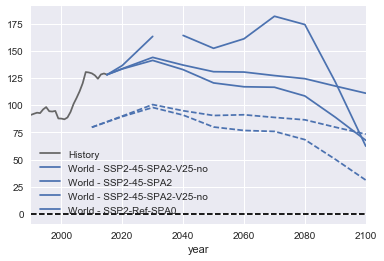

In [5]:
utils.plot_lines(df, gas='CO', sector='Industrial Sector', regions=['World'], unharmonized=True)

In [9]:
df.tail()

,region,model,scenario,ind,year,value,ssp,kind
403589,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|VOC|Peat Burning|Ha...,2100,5.037486,SSP2,45
403590,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|VOC|Residential Com...,2100,5.609534,SSP2,45
403591,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|VOC|Solvents Produc...,2100,24.886333,SSP2,45
403592,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|VOC|Transportation ...,2100,15.304725,SSP2,45
403593,World,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|VOC|Waste|Harmonize...,2100,1.337638,SSP2,45


In [36]:
df.scenario.unique()

array(['SSP2-45-SPA2-V25-no', 'SSP2-45-SPA2', 'CEDS'], dtype=object)

In [10]:
utils.shape(utils.harmdb(utils.model(df[df.region == 'World'])), utils.plt_idx)

model        MESSAGE-GLOBIOM                                               
region                 World                                               
ssp                     SSP2                                               
kind                      45                                            Ref
scenario SSP2-45-SPA2-V25-no SSP2-45-SPA2 SSP2-45-SPA2-V25-no SSP2-Ref-SPA0
year                                                                       
2010                     NaN          NaN                 NaN           NaN
2015                     NaN     7.316984            7.316984      7.316984
2020                     NaN     7.330947            7.330947      7.330947
2030                     NaN     6.880450            6.880450      6.880450
2040                6.419472     6.419472                 NaN      6.419472
2050                5.107759     5.107759                 NaN      5.107759
2060                3.941464     3.941464                 NaN      3.941464
2070                2.972024     2.972024                 NaN      2.972024
2080                2.267196     2.267196                 NaN      2.267196
2090                1.736238     1.736238                 NaN      1.736238
2100                1.337638     1.337638                 NaN      1.337638

In [15]:
utils.harmdb(utils.model(df[df.region == 'World']))

,region,model,scenario,ind,year,value,ssp,kind
383144,World,MESSAGE-GLOBIOM,SSP2-45-SPA2,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,2010,NaN,SSP2,45
383145,World,MESSAGE-GLOBIOM,SSP2-45-SPA2,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,2015,0.187327,SSP2,45
383146,World,MESSAGE-GLOBIOM,SSP2-45-SPA2,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,2020,0.200195,SSP2,45
383147,World,MESSAGE-GLOBIOM,SSP2-45-SPA2,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,2030,0.177838,SSP2,45
383148,World,MESSAGE-GLOBIOM,SSP2-45-SPA2,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,2040,0.156539,SSP2,45
383149,World,MESSAGE-GLOBIOM,SSP2-45-SPA2,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,2050,0.144043,SSP2,45
383150,World,MESSAGE-GLOBIOM,SSP2-45-SPA2,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,2060,0.128717,SSP2,45
383151,World,MESSAGE-GLOBIOM,SSP2-45-SPA2,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,2070,0.116603,SSP2,45
383152,World,MESSAGE-GLOBIOM,SSP2-45-SPA2,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,2080,0.104797,SSP2,45
383153,World,MESSAGE-GLOBIOM,SSP2-45-SPA2,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,2090,0.092766,SSP2,45


In [19]:
x = utils.harmdb(utils.model(df[df.region == 'World']))
x.set_index(utils.plt_idx + ['year'])['value'].unstack('year')

ValueError: Index contains duplicate entries, cannot reshape

In [23]:
y = utils.downselect(df, gas='CO', sector='Industrial Sector', regions=['World'])

In [24]:
_y = utils.harmdb(utils.model(y))

In [45]:
_y.set_index(utils.plt_idx + ['ind', 'year'])

value
model           region ssp  kind scenario            ind                                                year            
MESSAGE-GLOBIOM World  SSP2 45   SSP2-45-SPA2        CEDS+|9+ Sectors|Emissions|CO|Industrial Sector... 2010         NaN
                                                                                                        2015  128.032290
                                                                                                        2020  133.273720
                                                                                                        2030  141.139988
                                                                                                        2040  132.633783
                                                                                                        2050  120.429678
                                                                                                        2060  116.896997
                                                                                                        2070  116.456715
                                                                                                        2080  108.427740
                                                                                                        2090   88.884729
                                                                                                        2100   67.688822
                            Ref  SSP2-Ref-SPA0       CEDS+|9+ Sectors|Emissions|CO|Industrial Sector... 2010         NaN
                                                                                                        2015  128.032290
                                                                                                        2020  133.543470
                                                                                                        2030  143.928012
                                                                                                        2040  136.841802
                                                                                                        2050  130.744564
                                                                                                        2060  130.427747
                                                                                                        2070  127.193982
                                                                                                        2080  124.333056
                                                                                                        2090  117.549016
                                                                                                        2100  110.980918
                            45   SSP2-45-SPA2-V25-no CEDS+|9+ Sectors|Emissions|CO|Industrial Sector... 2015  128.032290
                                                                                                        2020  136.426377
                                                                                                        2030  163.200055
                                                                                                        2040  164.098885
                                                                                                        2050  152.266449
                                                                                                        2060  161.009165
                                                                                                        2070  181.737128
                                                                                                        2080  174.105588
                                                                                                        2090  121.321170
                                                                                                        2100   62.324667

In [28]:
_y.set_index(utils.plt_idx + ['year'])['value'].unstack('year')

year                                                  2010       2015  \
model           region ssp  kind scenario                               
MESSAGE-GLOBIOM World  SSP2 45   SSP2-45-SPA2-V25-no   NaN        NaN   
                                 SSP2-45-SPA2          NaN  128.03229   
                                 SSP2-45-SPA2-V25-no   NaN  128.03229   
                            Ref  SSP2-Ref-SPA0         NaN  128.03229   

year                                                        2020        2030  \
model           region ssp  kind scenario                                      
MESSAGE-GLOBIOM World  SSP2 45   SSP2-45-SPA2-V25-no         NaN         NaN   
                                 SSP2-45-SPA2         133.273720  141.139988   
                                 SSP2-45-SPA2-V25-no  136.426377  163.200055   
                            Ref  SSP2-Ref-SPA0        133.543470  143.928012   

year                                                        2040        2050  \
model           region ssp  kind scenario                                      
MESSAGE-GLOBIOM World  SSP2 45   SSP2-45-SPA2-V25-no  164.098885  152.266449   
                                 SSP2-45-SPA2         132.633783  120.429678   
                                 SSP2-45-SPA2-V25-no         NaN         NaN   
                            Ref  SSP2-Ref-SPA0        136.841802  130.744564   

year                                                        2060        2070  \
model           region ssp  kind scenario                                      
MESSAGE-GLOBIOM World  SSP2 45   SSP2-45-SPA2-V25-no  161.009165  181.737128   
                                 SSP2-45-SPA2         116.896997  116.456715   
                                 SSP2-45-SPA2-V25-no         NaN         NaN   
                            Ref  SSP2-Ref-SPA0        130.427747  127.193982   

year                                                        2080        2090  \
model           region ssp  kind scenario                                      
MESSAGE-GLOBIOM World  SSP2 45   SSP2-45-SPA2-V25-no  174.105588  121.321170   
                                 SSP2-45-SPA2         108.427740   88.884729   
                                 SSP2-45-SPA2-V25-no         NaN         NaN   
                            Ref  SSP2-Ref-SPA0        124.333056  117.549016   

year                                                        2100  
model           region ssp  kind scenario                         
MESSAGE-GLOBIOM World  SSP2 45   SSP2-45-SPA2-V25-no   62.324667  
                                 SSP2-45-SPA2          67.688822  
                                 SSP2-45-SPA2-V25-no         NaN  
                            Ref  SSP2-Ref-SPA0        110.980918

In [30]:
_y.set_index(utils.plt_idx)['year'].values

array([2010, 2015, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100,
       2010, 2015, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100,
       2015, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100])

In [37]:
cat test.csv

model,region,ssp,kind,scenario,year,ind,value
MESSAGE-GLOBIOM,World,SSP2,45,SSP2-45-SPA2,2010,CEDS+|9+ Sectors|Emissions|CO|Industrial Sector|Harmonized-DB,
MESSAGE-GLOBIOM,World,SSP2,45,SSP2-45-SPA2,2015,CEDS+|9+ Sectors|Emissions|CO|Industrial Sector|Harmonized-DB,128.032289837
MESSAGE-GLOBIOM,World,SSP2,45,SSP2-45-SPA2,2020,CEDS+|9+ Sectors|Emissions|CO|Industrial Sector|Harmonized-DB,133.273720175
MESSAGE-GLOBIOM,World,SSP2,45,SSP2-45-SPA2,2030,CEDS+|9+ Sectors|Emissions|CO|Industrial Sector|Harmonized-DB,141.139988157
MESSAGE-GLOBIOM,World,SSP2,45,SSP2-45-SPA2,2040,CEDS+|9+ Sectors|Emissions|CO|Industrial Sector|Harmonized-DB,132.633782914
MESSAGE-GLOBIOM,World,SSP2,45,SSP2-45-SPA2,2050,CEDS+|9+ Sectors|Emissions|CO|Industrial Sector|Harmonized-DB,120.429678486
MESSAGE-GLOBIOM,World,SSP2,45,SSP2-45-SPA2,2060,CEDS+|9+ Sectors|Emissions|CO|Industrial Sector|Harmonized-DB,116.896996859
MESSAGE-GLOBIOM,World,SSP2,45,SSP2-45-SPA2,2070,CEDS+|9+ Sectors|Emissions|CO|Industrial Sector|Har